<a href="https://colab.research.google.com/github/alexajimenez0/IAM-Dashboard/blob/main/Python_ML_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Intro to Machine Learning with Python
# We'll learn how to build a simple regression model using scikit-learn

# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Inspect data
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/11qbdlC3bEdqWIDRnl3SpcZpZd7jlpZvVbP7lbqWO7yQ/edit#gid=0


In [ ]:
# Let's try out some dataframe methods
print(df.shape)
print("-----------------------------------------------------------------------------")
print(df.info())
print("-----------------------------------------------------------------------------")
print(df.describe())
print("-----------------------------------------------------------------------------")
print(df['sepal length (cm)'])

(150, 5)
-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
-----------------------------------------------------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%            

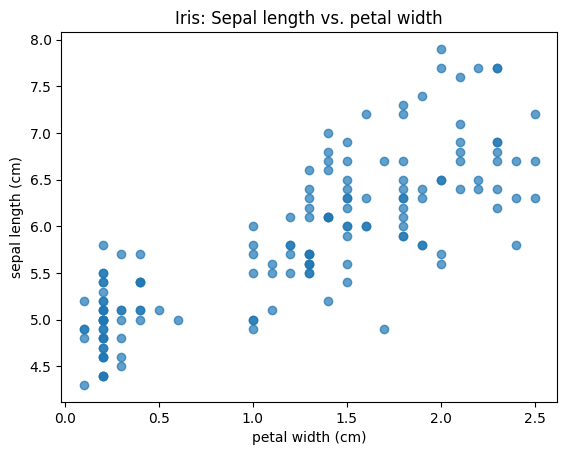

In [ ]:
# Let's graph the variables we are interested in.
plt.scatter(df['petal width (cm)'], df['sepal length (cm)'], alpha=0.7)
plt.xlabel('petal width (cm)')
plt.ylabel('sepal length (cm)')
plt.title('Iris: Sepal length vs. petal width')
plt.show()


In [ ]:
# Now, we will split the data into a training set and a testing set.
X = df[['petal width (cm)']]   # feature
y = df['sepal length (cm)']    # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train), " Test size:", len(X_test))



Train size: 120  Test size: 30


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (slope): 0.8776727380716685
Intercept: 4.770587259948525


In [ ]:
# Example prediction for a petal width of 1.5 cm
example_x = [[1.5]]
print("Predicted sepal length for petal width 1.5 cm:",
      float(model.predict(example_x)))


Predicted sepal length for petal width 1.5 cm: 6.087096367056027


In [ ]:
# Now, we will plug the entire X_test data into our model, which will give us a predicted y value for each test X.
y_pred = model.predict(X_test)

# Compare first few predictions
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(comparison.head())


   Actual  Predicted
0     6.1   5.823795
1     5.7   5.033889
2     7.7   6.789235
3     6.0   6.087096
4     6.8   5.999329


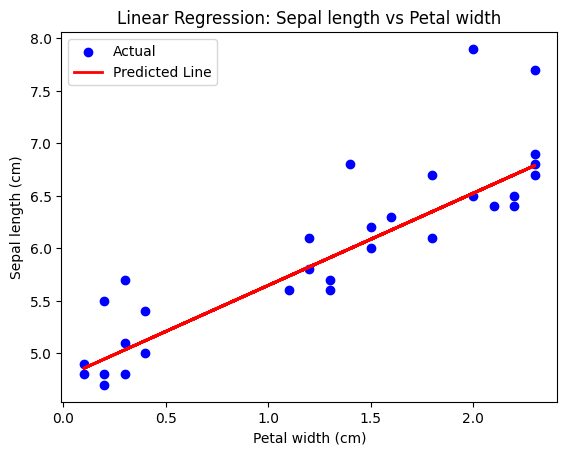

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Petal width (cm)")
plt.ylabel("Sepal length (cm)")
plt.legend()
plt.title("Linear Regression: Sepal length vs Petal width")
plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.16679303571495843
R² Score: 0.7583643484909817


Exercise: Replace petal width (cm) with a different feature and rerun the entire pipeline. Which feature predicts sepal length best?

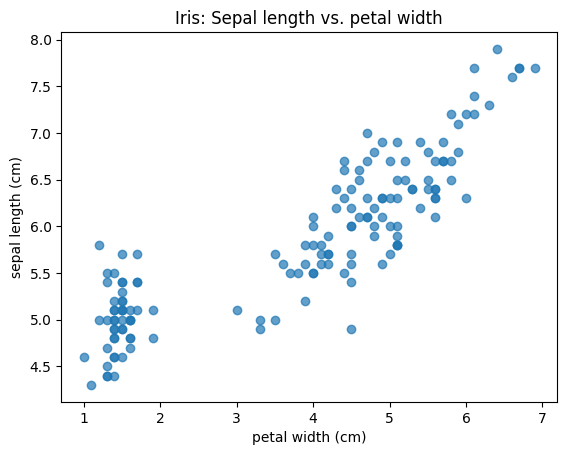

Coefficient (slope): 0.4053221728009456
Intercept: 4.298666036028475


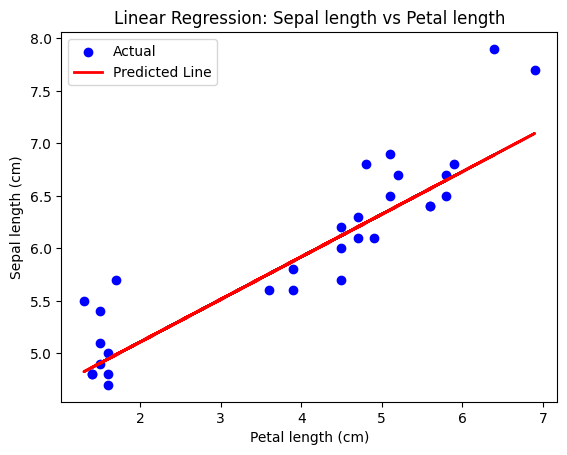

Mean Squared Error: 0.129093146356764
R² Score: 0.812980761507489


In [9]:
# === Exercise: Single-feature regression with petal length (outline only) ===



# 1) Set feature_col = 'petal length (cm)' and target_col = 'sepal length (cm)';
#    define X and y (X as a 2D DataFrame; y as a 1D Series).

X = df[['petal length (cm)']]   # feature
y = df['sepal length (cm)']    # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Plot a scatter of sepal length vs petal length.

plt.scatter(df['petal length (cm)'], df['sepal length (cm)'], alpha=0.7)
plt.xlabel('petal width (cm)')
plt.ylabel('sepal length (cm)')
plt.title('Iris: Sepal length vs. petal width')
plt.show()

# 3) Split X and y into X_train, X_test, y_train, y_test (test_size=0.2, random_state=42).



# 4) Instantiate LinearRegression and fit on the training data.

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# 5) Predict y values for X_test and store as y_pred.

y_pred = model.predict(X_test)

# 6) Plot the test scatter and overlay the regression line derived from the model’s predictions.

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Petal length (cm)")
plt.ylabel("Sepal length (cm)")
plt.legend()
plt.title("Linear Regression: Sepal length vs Petal length")
plt.show()


# 7) Compute test-set R^2 and MSE.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# 8) Conclude which feature (petal width vs petal length) is the better predictor based on higher R^2 and lower MSE.
petal length